## Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Lawrence\Documents\Career Foundry Projects\Data Immersion\Achievement #6\Achievement #6 Project Files'

In [4]:
# Import the university ratings data

ratings = pd.read_pickle(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'uni_ratings_v2.pkl'))

In [5]:
ratings.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,student_staff_ratio,Score category,num_students,international_students_%
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,8.9,High score,20152.0,0.25
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,9.0,High score,11074.0,0.33
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,7.8,High score,15596.0,0.22
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,11.8,High score,18812.0,0.34
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,6.9,High score,2243.0,0.27


In [6]:
ratings.shape

(2200, 18)

In [7]:
ratings.dtypes

world_rank                    int64
institution                  object
country                      object
national_rank                 int64
quality_of_education          int64
alumni_employment             int64
quality_of_faculty            int64
publications                  int64
influence                     int64
citations                     int64
broad_impact                float64
patents                       int64
score                       float64
year                          int64
student_staff_ratio         float64
Score category               object
num_students                float64
international_students_%    float64
dtype: object

In [8]:
# Rename USA to United States of America
ratings['country'] = ratings['country'].replace("USA", 'United States of America')

In [9]:
ratings['country'].value_counts()

country
United States of America    573
China                       167
Japan                       159
United Kingdom              144
Germany                     115
France                      109
Italy                        96
Spain                        81
Canada                       72
South Korea                  72
Australia                    58
Taiwan                       46
Brazil                       36
India                        31
Netherlands                  29
Switzerland                  26
Sweden                       24
Austria                      24
Israel                       22
Finland                      20
Turkey                       20
Belgium                      20
Poland                       18
Iran                         16
Ireland                      16
Portugal                     14
Greece                       14
Hong Kong                    12
Norway                       12
New Zealand                  12
Hungary                      12


## Data wrangling and reprocessing

In [10]:
# Region = North America
ratings.loc[ratings['country'].isin(['United States of America', 'Canada', 'Mexico', 'Puerto Rico']), 'region'] = 1 

In [11]:
# Region = Asia and Oceania
ratings.loc[ratings['country'].isin(['China', 'Japan', 'South Korea', 'Taiwan', 'India', 'Hong Kong', 'Saudi Arabia', 'Thailand',
                                     'Malaysia', 'Singapore', 'Turkey', 'Israel', 'Iran', 'Lebanon', 'United Arab Emirates', 'Australia', 'New Zealand']), 'region'] = 2 

In [12]:
# Region = Europe
ratings.loc[ratings['country'].isin(['United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands', 'Switzerland', 'Sweden',
                                    'Austria', 'Finland', 'Belgium', 'Poland', 'Ireland', 'Portugal', 'Greece', 'Norway', 'Hungary', 'Denmark',
                                    'Czech Republic', 'Russia', 'Slovenia', 'Romania', 'Croatia', 'Estonia', 'Slovak Republic',
                                    'Iceland', 'Serbia', 'Bulgaria', 'Lithuania', 'Cyprus']), 'region'] = 3

In [13]:
# Region = South America
ratings.loc[ratings['country'].isin(['Brazil', 'Chile', 'Argentina', 'Colombia', 'Uruguay']), 'region'] = 4

In [14]:
# Region = Africa
ratings.loc[ratings['country'].isin(['South Africa', 'Egypt', 'Uganda']), 'region'] = 5

In [15]:
ratings['region'].value_counts(dropna = False)

region
3.0    828
1.0    651
2.0    644
4.0     57
5.0     20
Name: count, dtype: int64

In [16]:
ratings.isnull().sum()

world_rank                     0
institution                    0
country                        0
national_rank                  0
quality_of_education           0
alumni_employment              0
quality_of_faculty             0
publications                   0
influence                      0
citations                      0
broad_impact                 200
patents                        0
score                          0
year                           0
student_staff_ratio         1415
Score category                 0
num_students                1415
international_students_%    1417
region                         0
dtype: int64

In [17]:
ratings_2 = ratings.dropna()

In [18]:
ratings_2.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,student_staff_ratio,Score category,num_students,international_students_%,region
200,1,Harvard University,United States of America,1,1,1,1,1,1,1,1.0,2,100.00,2014,8.9,High score,20152.0,0.25,1.0
201,2,Stanford University,United States of America,2,11,2,4,5,3,3,4.0,6,99.09,2014,7.8,High score,15596.0,0.22,1.0
202,3,Massachusetts Institute of Technology,United States of America,3,3,11,2,15,2,2,2.0,1,98.69,2014,9.0,High score,11074.0,0.33,1.0
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014,11.8,High score,18812.0,0.34,3.0
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014,11.6,High score,19919.0,0.34,3.0


In [19]:
ratings_2.shape

(639, 19)

In [20]:
# Drop columns that contain categorical variables and variables with too large scale
ratings_3 = ratings_2.drop(columns = ['institution', 'country', 'year', 'Score category', # categorical values
                                   'num_students']) #large scale

In [21]:
ratings_3.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,student_staff_ratio,international_students_%,region
200,1,1,1,1,1,1,1,1,1.0,2,100.00,8.9,0.25,1.0
201,2,2,11,2,4,5,3,3,4.0,6,99.09,7.8,0.22,1.0
202,3,3,3,11,2,15,2,2,2.0,1,98.69,9.0,0.33,1.0
203,4,1,2,10,5,10,9,12,13.0,48,97.64,11.8,0.34,3.0
204,5,2,7,12,10,11,12,11,12.0,16,97.51,11.6,0.34,3.0


In [22]:
ratings_3.shape

(639, 14)

## Build the clustering model

In [23]:
# Define the range of potential clusters and the specific k-means clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [24]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(ratings_3).score(ratings_3) for i in range(len(kmeans))]

score

C:\Users\Lawrence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lawrence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Lawrence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lawrence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

[-227289529.22388542,
 -112146986.81825851,
 -85756805.42568602,
 -73875302.08845711,
 -65322162.18448596,
 -60207395.16738915,
 -55862595.839601815,
 -52025856.119964354,
 -49159784.18927697]

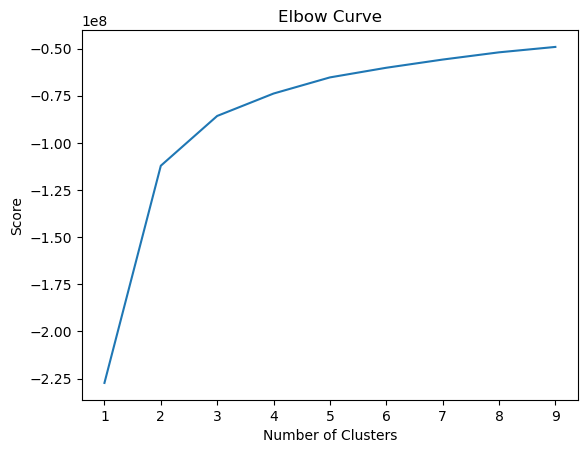

In [25]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The number of clusters I will choose to use for my k-means algorithm is 3. The breakpoint of this elbow curve is a bit ambiguous. However, to me, points 4 and 5 appear almost invisible as inflection points. 3 appears to be the most clear.

## Applying k-means clustering

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [27]:
# Fit the k-means object to the data.

kmeans.fit(ratings_3)

C:\Users\Lawrence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lawrence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [28]:
# Attach a new column to the dataframe with the resulting clusters
ratings_3['clusters'] = kmeans.fit_predict(ratings_3)

C:\Users\Lawrence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lawrence\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [29]:
ratings_3.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,student_staff_ratio,international_students_%,region,clusters
200,1,1,1,1,1,1,1,1,1.0,2,100.00,8.9,0.25,1.0,0
201,2,2,11,2,4,5,3,3,4.0,6,99.09,7.8,0.22,1.0,0
202,3,3,3,11,2,15,2,2,2.0,1,98.69,9.0,0.33,1.0,0
203,4,1,2,10,5,10,9,12,13.0,48,97.64,11.8,0.34,3.0,0
204,5,2,7,12,10,11,12,11,12.0,16,97.51,11.6,0.34,3.0,0


In [30]:
ratings_3['clusters'].value_counts()

clusters
2    265
0    241
1    133
Name: count, dtype: int64

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


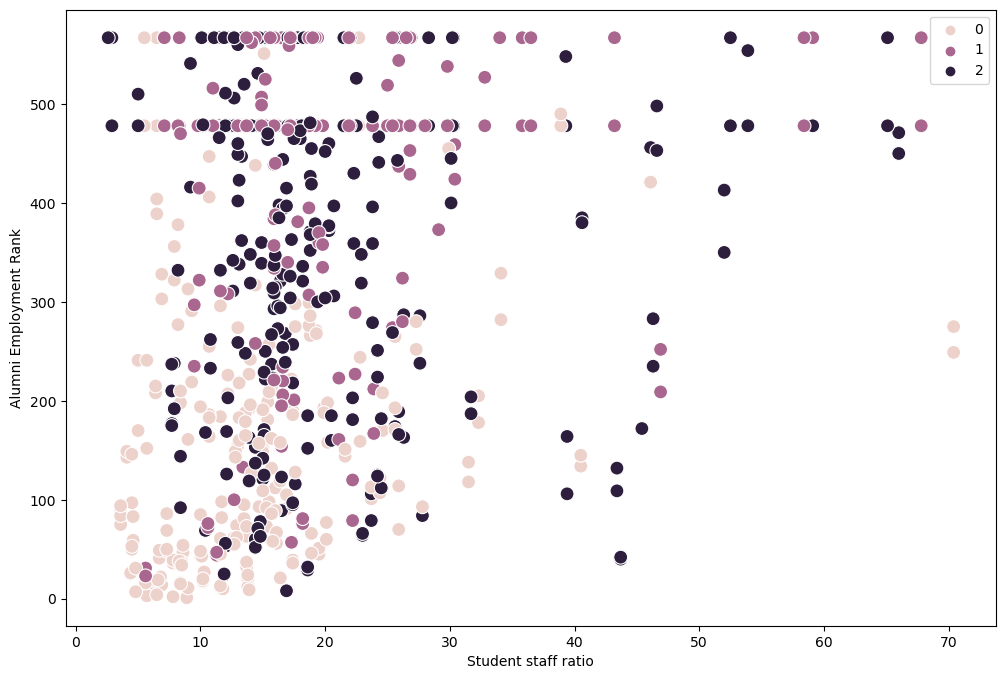

In [31]:
# Plot the clusters for the "Student staff ratio" and "Alumni Employment Rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ratings_3['student_staff_ratio'], y=ratings_3['alumni_employment'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Student staff ratio')
plt.ylabel('Alumni Employment Rank')
plt.show()

In the above chart, cluster 0 seems to mostly work as a group for low student staff ratio and high alumni employment rank. It has a couple of outliers though. Clusters 1 and 2 do not really seem to work in a way that they can be clearly distinguished from each other.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


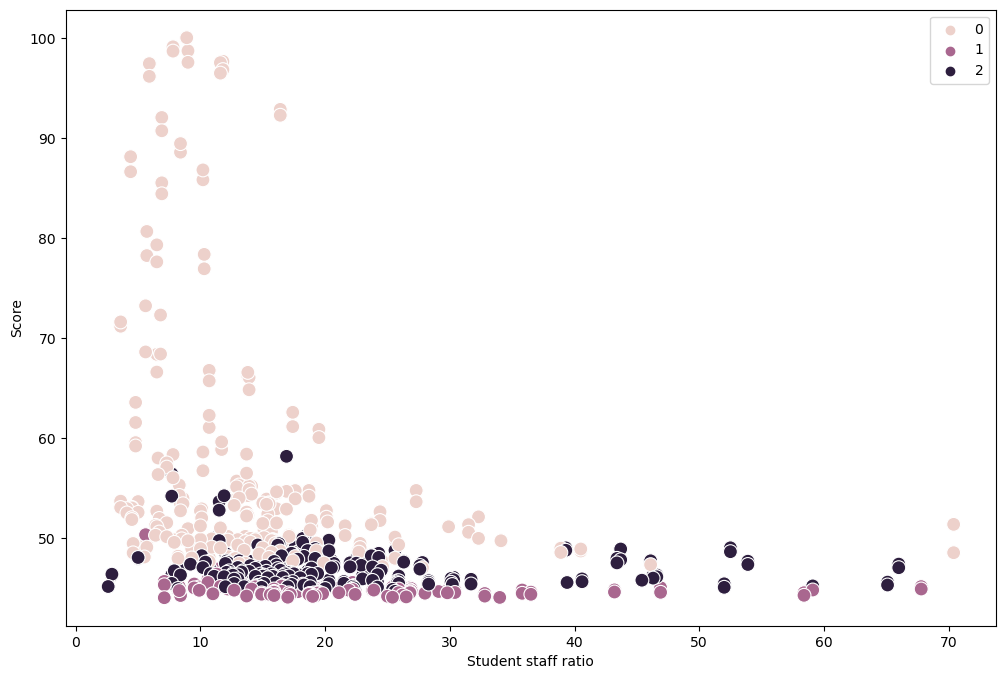

In [32]:
# Plot the clusters for the "Student staff ratio" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ratings_3['student_staff_ratio'], y=ratings_3['score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Student staff ratio')
plt.ylabel('Score')
plt.show()

In the above chart, the three clusters can be mostly distinguished clearly by the range of scores they belong to. 
Cluster 0 is a relatively wide band containing data points of what looks like scores 45 or higher. 
Cluster 1 is a thin band of the lowest scores. 
Cluster 2 is a slightly wide and dense band in between. This cluster seems to contain some outliers that exist well within the score ranges of Cluster 0.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


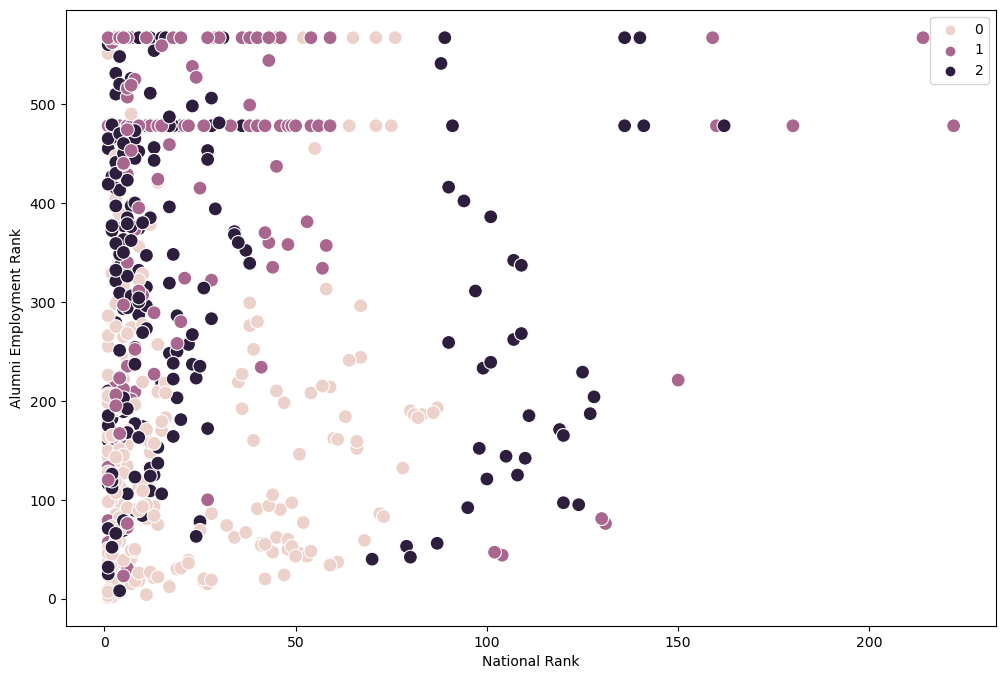

In [33]:
# Plot the clusters for the "National Rank" and "Alumni Employment Rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ratings_3['national_rank'], y=ratings_3['alumni_employment'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('National Rank')
plt.ylabel('Alumni Employment Rank')
plt.show()

Cluster 0 appears to mostly contain points of high national rank (ranks 1 to 90). Clusters 2 and 3 do not seem to work as it is unclear what distinguishes the two from each other. There are a few traits separating them though. One may be that Cluster 1 seems to contain much more points of tied Alumni Employment Rank at roughly 480 and 580. Another may be that Cluster 2 contains a lot of points between the National Ranks of 70 through 150, while Cluster 1 contains the points with the lowest National Rank relative to their Alumni Employment Rank. The rest is very unclear.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


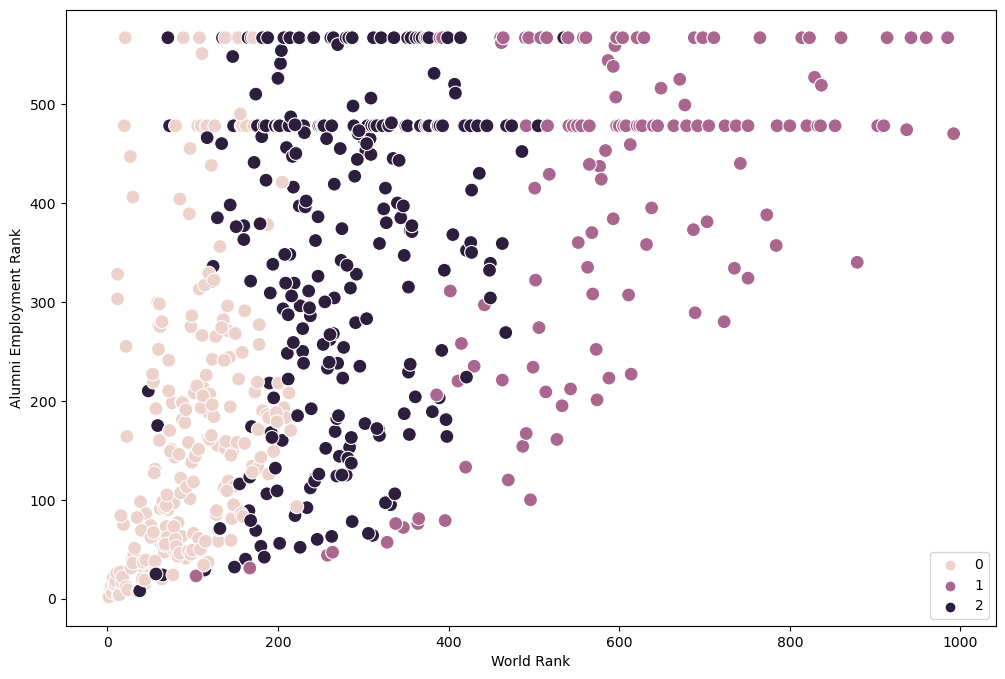

In [34]:
# Plot the clusters for the "World Rank" and "Alumni Employment Rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ratings_3['world_rank'], y=ratings_3['alumni_employment'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('World Rank')
plt.ylabel('Alumni Employment Rank')
plt.show()

There is a strong distinction between the three clusters based on how high their World Rank is relative to their Alumni Employment Rank.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


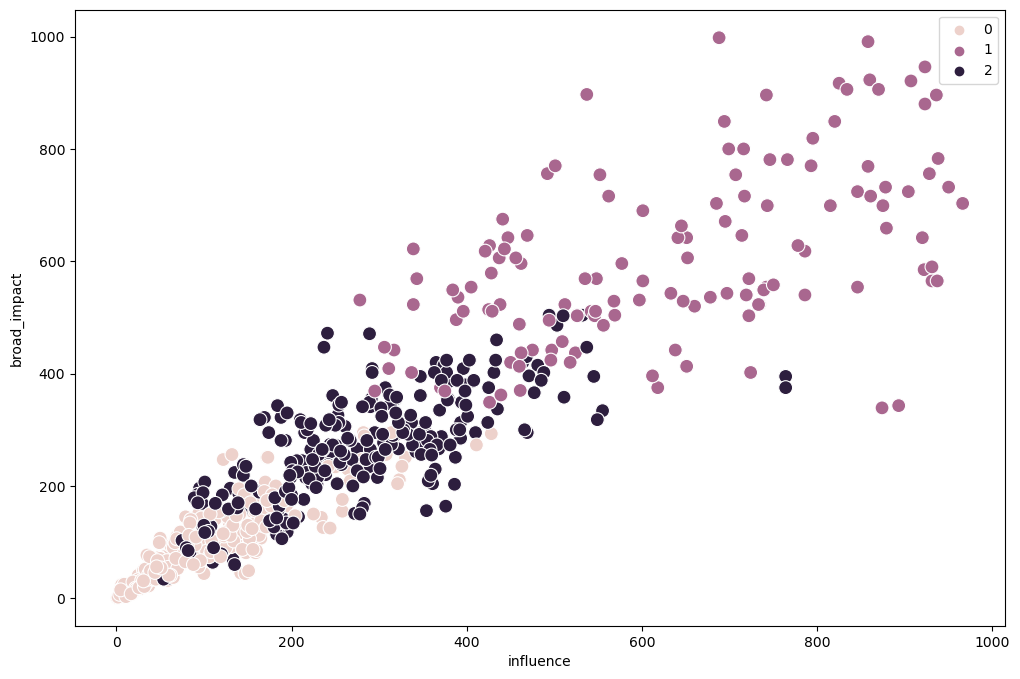

In [35]:
# Plot the clusters for the "Influence" and "Broad Impact Rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ratings_3['influence'], y=ratings_3['broad_impact'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('influence')
plt.ylabel('broad_impact')
plt.show()

There is a strong distinction between the three clusters. 
Cluster 0 seems to be the most dense and have the highest ranks in both influence and broad impact. 
Cluster 1 seems to be the least dense and covers the lowest ranks in both influence and broad impact.
Cluster 2 is in the middle in regards to both density and rank position covered.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


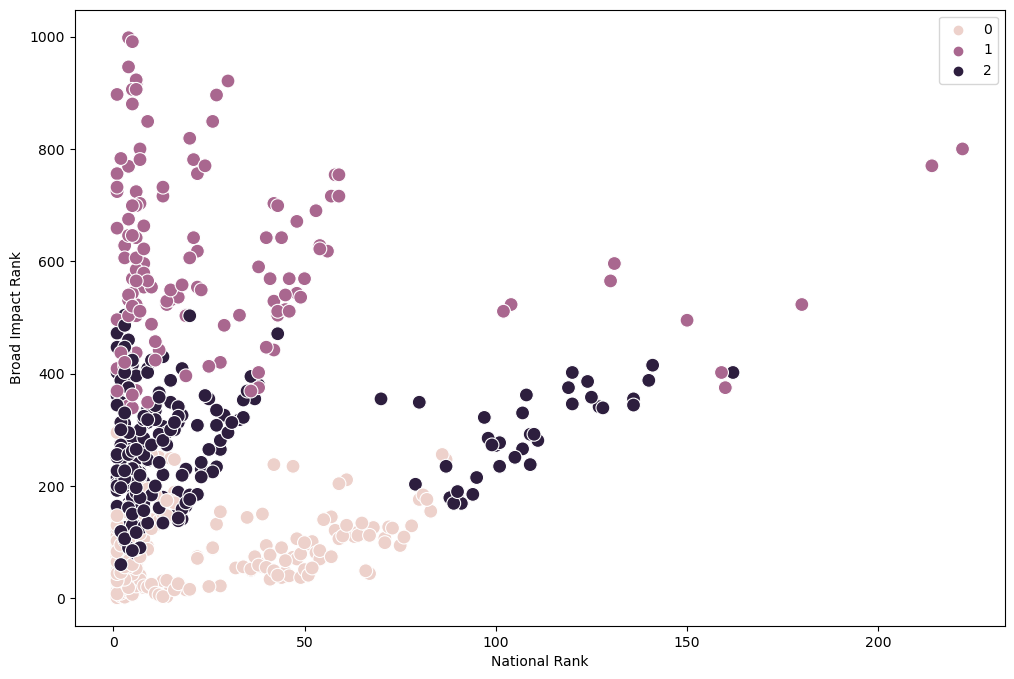

In [36]:
# Plot the clusters for the "National Rank" and "Broad Impact Rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ratings_3['national_rank'], y=ratings_3['broad_impact'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('National Rank')
plt.ylabel('Broad Impact Rank')
plt.show()

There is a strong distinction between the clusters. They seem to be separated mainly by their broad impact rank relative to their national rank.

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


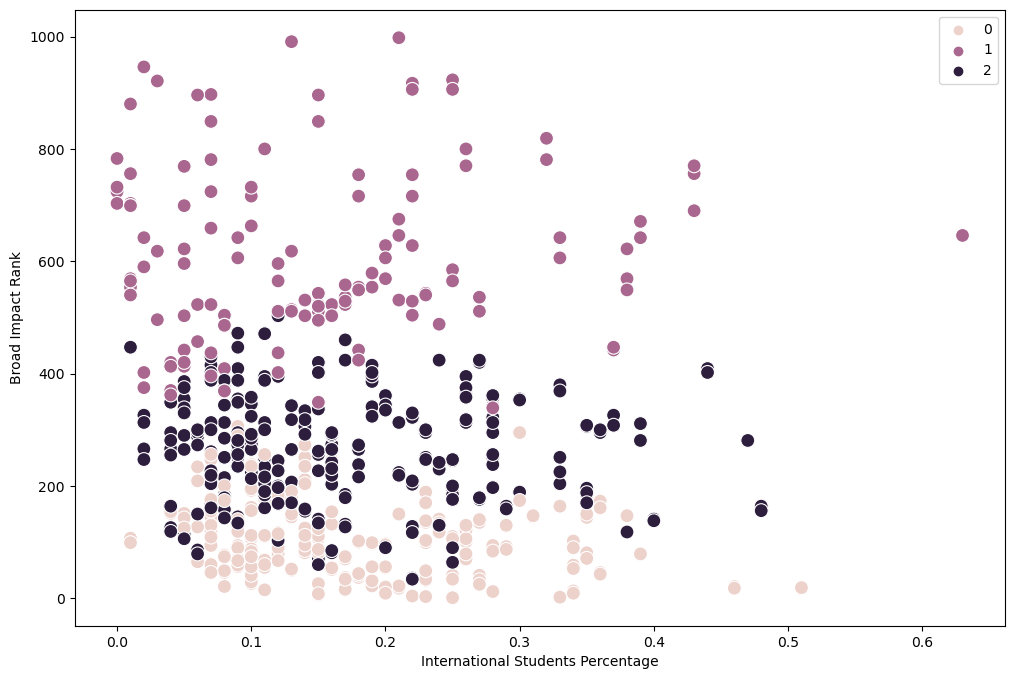

In [37]:
# Plot the clusters for the "International Students Percentage" and "Broad Impact Rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ratings_3['international_students_%'], y=ratings_3['broad_impact'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('International Students Percentage')
plt.ylabel('Broad Impact Rank')
plt.show()

The main distinction between the three clusters appears to be their broad impact ranking. International Students percentage does not seem to be a factor. Clusters 0 and 2 also seem to have a decent bit of overlap.

In [38]:
# Create a categorical column for the cluster variable
ratings_3.loc[ratings_3['clusters'] == 2, 'cluster'] = 'dark purple'
ratings_3.loc[ratings_3['clusters'] == 1, 'cluster'] = 'purple'
ratings_3.loc[ratings_3['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_2596\1445811548.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ratings_3.loc[ratings_3['clusters'] == 2, 'cluster'] = 'dark purple'


In [39]:
# Create a table to display aggregate statistics grouped by cluster
cluster_agg = ratings_3.groupby('cluster').agg({'world_rank':['mean', 'median'], 
                         'national_rank':['mean', 'median'], 
                         'alumni_employment':['mean', 'median'],
                            'quality_of_education':['mean', 'median'],
                            'quality_of_faculty':['mean', 'median'], 
                            'broad_impact':['mean', 'median'],
                           'influence':['mean', 'median'],
                            'score':['mean', 'median'],
                           'international_students_%':['mean', 'median'],
                          'student_staff_ratio':['mean', 'median']})
cluster_agg

world_rank        national_rank        alumni_employment         \
                   mean median          mean median              mean median   
cluster                                                                        
dark purple  270.513208  264.0     23.467925    8.0        349.577358  377.0   
pink          89.908714   87.0     20.439834    8.0        158.087137  126.0   
purple       601.932331  593.0     29.135338   13.0        404.082707  478.0   

            quality_of_education        quality_of_faculty         \
                            mean median               mean median   
cluster                                                             
dark purple           271.815094  316.0         188.562264  210.0   
pink                  143.887967  111.0         113.800830  102.0   
purple                333.909774  355.0         211.082707  210.0   

            broad_impact          influence             score         \
                    mean median        mean median       mean median   
cluster                                                                
dark purple   262.622642  265.0  275.071698  264.0  46.978830  46.58   
pink           98.535270   89.0  106.190871   92.0  57.520747  51.96   
purple        605.015038  569.0  631.030075  638.0  44.843383  44.72   

            international_students_%        student_staff_ratio         
                                mean median                mean median  
cluster                                                                 
dark purple                 0.167170   0.15           20.315094   17.0  
pink                        0.176598   0.15           14.347718   13.1  
purple                      0.152782   0.14           21.404511   18.7

The pink cluster appears to contain the highest ranked schools worldwide by far. Naturally, they rank the highest in broad impact, alumni employment, quality of education, and influence as well. They have the highest median score and mean score by a huge margin. Their student staff ratio is also the lowest. They have the highest portion of international students in their student body by a slight margin.

The dark purple cluster appears to contain the universities with a score in th medium range. They are in the medium range in world rank. However, they are not far behind the pink cluster when it comes to national rank. The median national rank is actually the same as that of the dark purple cluster. They also have the same median international students percentage. The rest of their statistics (except for mean influence rank) stray significantly closer to the purple cluster though.

The purple cluster contains the lowest ranked and scoring universities. Their median national rank (12.5), is significantly lower compared to that of the other two clusters (8.0). They have slightly less international students percentage. 

## Recommendations for future steps

For clusters that appear to be well defined, such as the pink cluster in this case representing the most elite universities around the world, it could be worthwhile to perform regression analysis to find answers to specific questions that might be particularly pertinent to those schools.

For comparisons that did not produce well distinguished or effective clusters, further analysis could be explored by excluding the variables with more limited data that is a limiting factor to the amount of data points that could be fitted to the model, and then re-running the clustering with more data points.



In [ ]:
# Re-insert the categorical variables removed at the start of the exercise back into the dataset

In [40]:
ratings_3['institution'] = ratings_2['institution']

In [41]:
ratings_3['country'] = ratings_2['country']

In [42]:
ratings_3['score category'] = ratings_2['Score category']

In [43]:
ratings_3['year'] = ratings_2['year']

In [44]:
ratings_3.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,student_staff_ratio,international_students_%,region,clusters,cluster,institution,country,score category,year
200,1,1,1,1,1,1,1,1,1.0,2,100.00,8.9,0.25,1.0,0,pink,Harvard University,United States of America,High score,2014
201,2,2,11,2,4,5,3,3,4.0,6,99.09,7.8,0.22,1.0,0,pink,Stanford University,United States of America,High score,2014
202,3,3,3,11,2,15,2,2,2.0,1,98.69,9.0,0.33,1.0,0,pink,Massachusetts Institute of Technology,United States of America,High score,2014
203,4,1,2,10,5,10,9,12,13.0,48,97.64,11.8,0.34,3.0,0,pink,University of Cambridge,United Kingdom,High score,2014
204,5,2,7,12,10,11,12,11,12.0,16,97.51,11.6,0.34,3.0,0,pink,University of Oxford,United Kingdom,High score,2014


In [45]:
# Export data
ratings_3.to_csv(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'uni_ratings_finalv3.csv'))
cluster_agg.to_csv(os.path.join(path, '02 Project Datasets', 'Prepared Data', 'cluster_agg_table.csv'))